<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/24%20-%20Sklearn%20%3A%20Apprentissage%20Non-supervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24/30 Apprentissage Non-Supervisé

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1. K-Means Clustering

In [36]:
from sklearn.cluster import KMeans

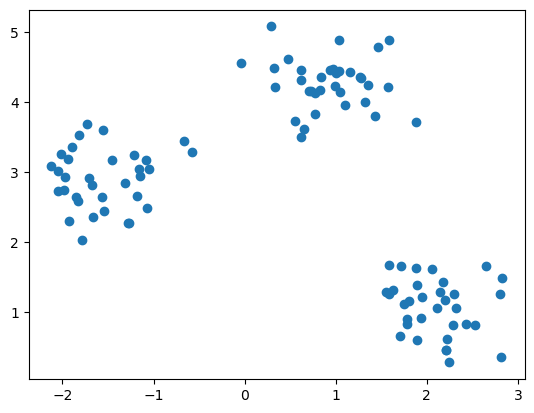

In [37]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


-30.870531280140675

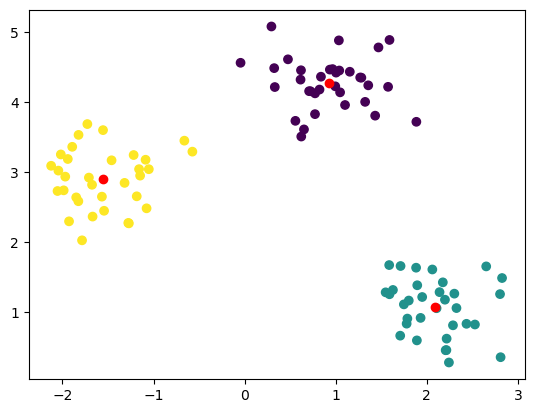

In [38]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

### Elbow Method

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Text(0, 0.5, 'Cout du modele (Inertia)')

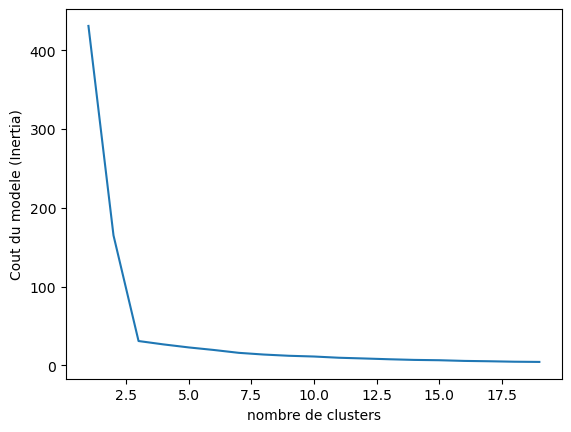

In [39]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. Detection d'anomalies avec Isolation Forest

In [40]:
from sklearn.ensemble import IsolationForest

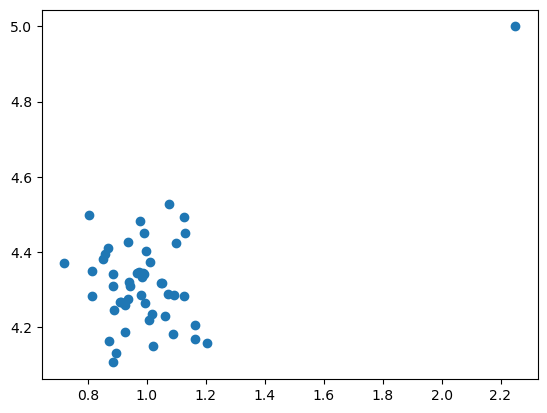

In [41]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

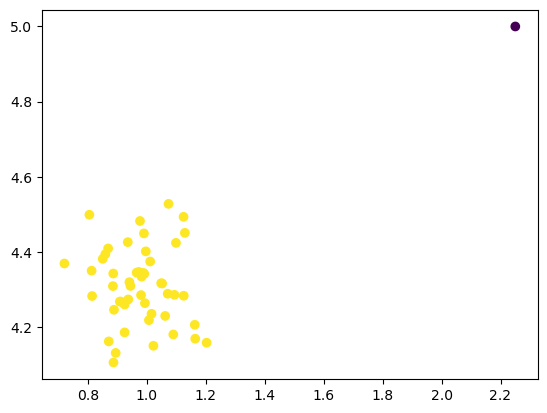

In [42]:
model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

### Application : Digits Outliers

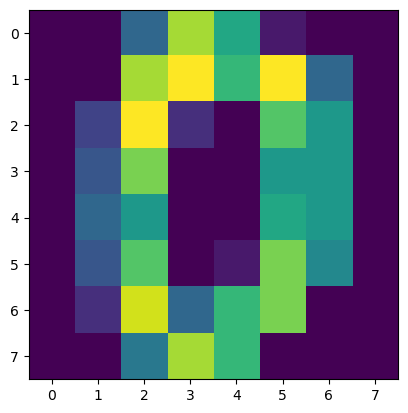

In [43]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[0])

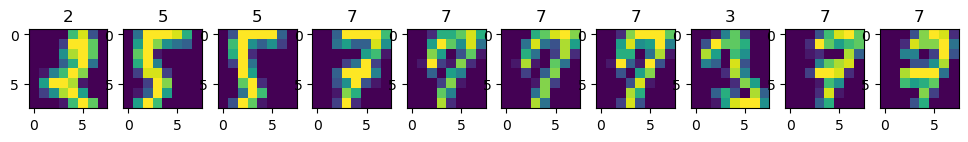

In [53]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)

outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## 2. PCA : Reduction de dimension

### Visualisation 2D

In [45]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

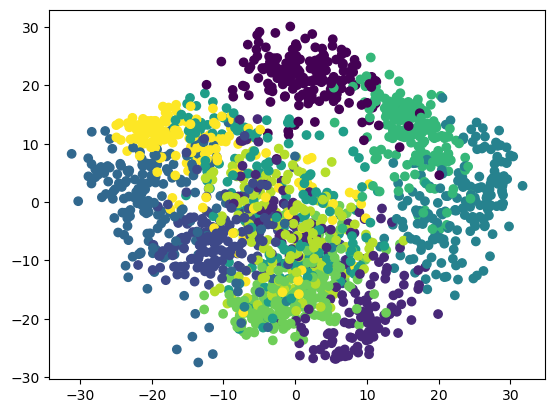

In [46]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

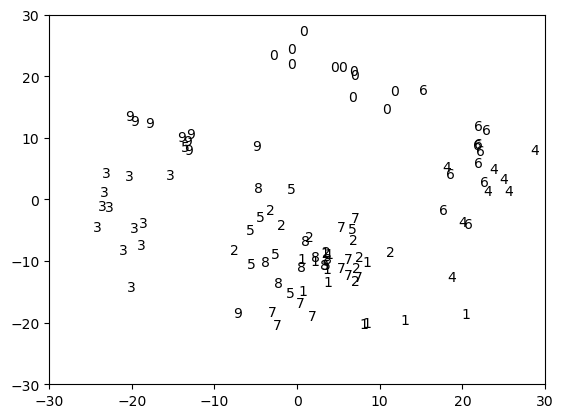

In [47]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

### Compression de données

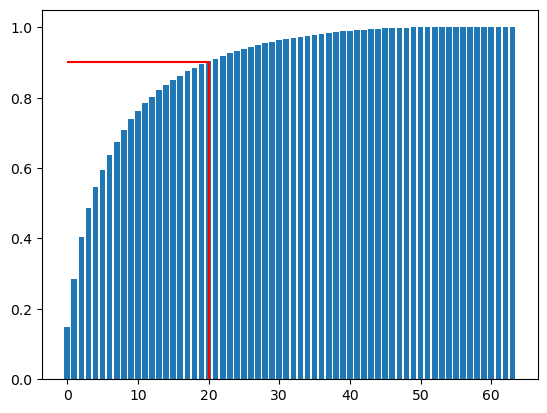

In [54]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)
meilleur_dims

plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')


In [55]:
meilleur_dims

20

In [49]:
model = PCA(n_components=0.99)
model.fit(X)

PCA(n_components=0.99)

Text(0.5, 1.0, 'Compressé')

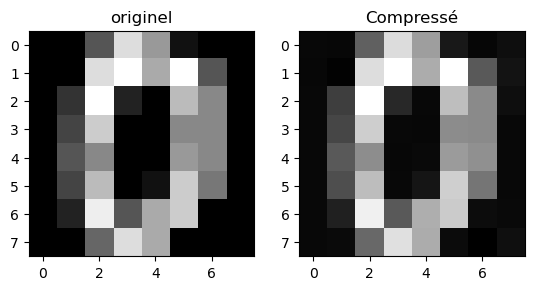

In [50]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')